In [31]:
import pandas as pd
import numpy as np
import seaborn as sns

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline
# set seed for reproducibility
np.random.seed(0)

In [33]:
# Dataset File Path
TRAIN_FILE_PATH = "training_set_0.tar.gz"
TRACK_FILE_PATH = "track_features.tar.gz"

In [55]:
track_data = pd.read_csv(TRACK_FILE_PATH, compression='gzip')

C:\Users\DELL\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,18,19,20,21,22,23,24,25,26,27,28,29) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [56]:
train_data = pd.read_csv(TRAIN_FILE_PATH, compression='gzip', nrows=100000)

In [57]:
train_data.head()

,./training_set/log_0_20180715_000000000000.csv,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,20,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,20,t_64f3743c-f624-46bb-a579-0f3f9a07a123,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone


In [58]:
train_data.rename(columns={train_data.columns[0]: 'session_id'}, inplace=True)

track_data.rename(columns={'track_features/':"track_id"}, inplace=True)

In [59]:
train_data.head()

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,20,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,20,t_64f3743c-f624-46bb-a579-0f3f9a07a123,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone


In [60]:
track_data.head()

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,t_2e8f4b71-8a0b-4b9c-b7d8-fb5208e87f9f,326.013,1971,99.5829,0.716209,0.366495,0.332605,0.439835,5.80577,0.238847,...,4,0.223395,0.146012,-0.706908,0.259496,0.481157,0.238427,-0.0983893,-0.25496,-0.227383
1,t_dae2ec0e-ec7b-4b3e-b60c-4a884d0eccb0,147.813,1963,97.272,0.83946,0.362212,0.389829,0.50758,6.84543,0.420476,...,4,0.484702,0.0395539,-0.539554,0.105141,0.692589,0.226047,-0.468162,0.164389,-0.769024
2,t_cf0164dd-1531-4399-bfa6-dec19cd1fedc,110.4,1974,99.6204,0.0546728,0.495002,0.589378,0.552311,9.36195,0.842938,...,4,0.818441,0.0838626,-0.242108,-0.0142578,0.0963959,0.417641,-0.0505763,-0.204757,-0.172563
3,t_0f90acc7-d5c5-4e53-901d-55610fbd090c,237.653,1988,96.7968,0.0426063,0.389634,0.359044,0.585673,6.06858,0.665398,...,4,0.594829,0.192498,0.340039,0.034846,-0.389794,0.518381,0.185008,-0.0799067,-0.0169785
4,t_36b9ad02-095a-443d-a697-6c7285d9410a,174.6,1987,97.9059,0.249982,0.51364,0.485435,0.635095,7.19874,0.408715,...,4,0.591289,0.270586,-0.411061,0.165898,0.225652,0.335518,-0.0366425,-0.0162996,-0.44687


In [61]:
track_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3706390 entries, 0 to 3706389
Data columns (total 30 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   track_id                object
 1   duration                object
 2   release_year            object
 3   us_popularity_estimate  object
 4   acousticness            object
 5   beat_strength           object
 6   bounciness              object
 7   danceability            object
 8   dyn_range_mean          object
 9   energy                  object
 10  flatness                object
 11  instrumentalness        object
 12  key                     object
 13  liveness                object
 14  loudness                object
 15  mechanism               object
 16  mode                    object
 17  organism                object
 18  speechiness             object
 19  tempo                   object
 20  time_signature          object
 21  valence                 object
 22  acoustic_vector_0 

In [62]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   session_id                       100000 non-null  object
 1   session_position                 100000 non-null  int64 
 2   session_length                   100000 non-null  int64 
 3   track_id_clean                   100000 non-null  object
 4   skip_1                           100000 non-null  bool  
 5   skip_2                           100000 non-null  bool  
 6   skip_3                           100000 non-null  bool  
 7   not_skipped                      100000 non-null  bool  
 8   context_switch                   100000 non-null  int64 
 9   no_pause_before_play             100000 non-null  int64 
 10  short_pause_before_play          100000 non-null  int64 
 11  long_pause_before_play           100000 non-null  int64 
 12  hist_user_behavio

In [63]:

train_data = train_data.rename(columns={'track_id_clean': 'track_id'})

train_data

,session_id,session_position,session_length,track_id,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,20,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,20,t_64f3743c-f624-46bb-a579-0f3f9a07a123,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0_08b98bb8-29ce-44d9-8839-914e31a11044,7,20,t_a323b398-59c8-441d-802a-807c92f0c969,True,True,True,False,0,1,...,0,0,0,True,1,2018-07-15,False,user_collection,fwdbtn,fwdbtn
99996,0_08b98bb8-29ce-44d9-8839-914e31a11044,8,20,t_0c58f726-2f02-47e8-b4d4-3717ff1b06f0,True,True,True,False,0,0,...,1,0,0,True,1,2018-07-15,False,user_collection,fwdbtn,fwdbtn
99997,0_08b98bb8-29ce-44d9-8839-914e31a11044,9,20,t_b0a7549c-e538-4706-8cd7-ac18c7c00e15,True,True,True,False,0,0,...,1,0,0,True,1,2018-07-15,False,user_collection,fwdbtn,fwdbtn
99998,0_08b98bb8-29ce-44d9-8839-914e31a11044,10,20,t_26cd91b7-47aa-42f0-80c2-1667d3e05bc1,True,True,True,False,0,1,...,0,0,0,True,1,2018-07-15,False,user_collection,fwdbtn,fwdbtn


In [64]:
# merging data using left join
merged_data = train_data.merge(track_data, left_on="track_id", right_on="track_id", how="left")
merged_data.drop("track_id", axis=1, inplace=True)

In [65]:
merged_data.head()

,session_id,session_position,session_length,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,False,False,False,True,0,0,0,...,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.0154517,-0.35359,0.205826
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,False,False,False,True,0,1,0,...,4,0.337152,-0.713646,0.363718,0.310315,-0.0422223,-0.383164,0.0663567,-0.365308,0.15792
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,False,False,False,True,0,1,0,...,4,0.373862,-0.742541,0.375599,0.25266,-0.0490069,-0.299745,0.0633409,-0.486689,0.181604
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,20,False,False,False,True,0,1,0,...,4,0.64942,-0.705116,0.317562,0.289141,-0.0389203,-0.393358,0.092719,-0.364418,0.285603
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,20,False,False,False,True,0,1,0,...,4,0.652921,-0.868489,0.33128,0.210478,0.0847402,-0.333287,-0.0257062,-0.51035,0.182315


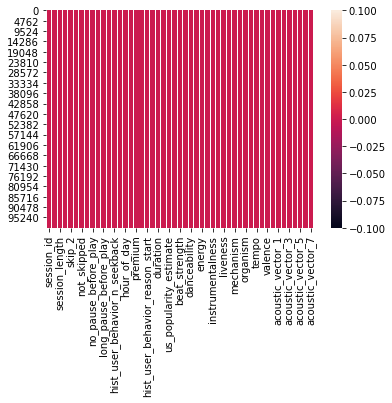

In [66]:
sns.heatmap(merged_data.isnull())

**DATA PRE_PROCESSING**

In [70]:
# 1. handling missing values

# get the number of missing data points per column
missing_values_count = merged_data.isnull().sum()
missing_values_count


session_id                         0
session_position                   0
session_length                     0
skip_1                             0
skip_2                             0
skip_3                             0
not_skipped                        0
context_switch                     0
no_pause_before_play               0
short_pause_before_play            0
long_pause_before_play             0
hist_user_behavior_n_seekfwd       0
hist_user_behavior_n_seekback      0
hist_user_behavior_is_shuffle      0
hour_of_day                        0
date                               0
premium                            0
context_type                       0
hist_user_behavior_reason_start    0
hist_user_behavior_reason_end      0
duration                           0
release_year                       0
us_popularity_estimate             0
acousticness                       0
beat_strength                      0
bounciness                         0
danceability                       0
d

Hence no missing values found

In [122]:
#parsing dates

# create a new column, date_parsed, with the parsed dates
merged_data['date_parsed'] = pd.to_datetime(merged_data['date'], format="%Y-%m-%d")

#creating a column for weekday and dropping the date column

merged_data['day_of_week']= merged_data['date_parsed'].dt.dayofweek

KeyError: 'date'

Hence we transformed the date column from object datatype to datetime dtype

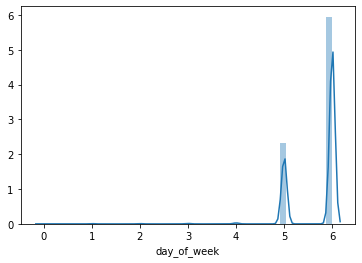

In [99]:
sns.distplot(merged_data['day_of_week'])

Hence it can be seen that maximum tracks are played on *Saturday* (day_of_week = 5) and the most are played on *Sunday* (day_of_week = 6)


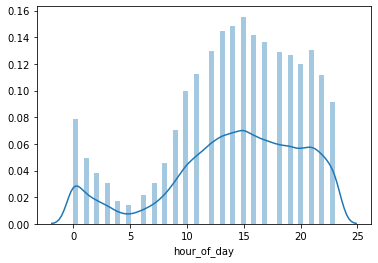

In [110]:
sns.distplot(merged_data['hour_of_day'])

We can observe the music are listened to the most at 3 pm in the afternoon and usually preffered time is from 12 pm to 12am

In [101]:
#dropping the date column as we have date_parsed column
merged_data = merged_data.drop('date', axis=1)

In [102]:
#get a list of categorical values
s = (merged_data.dtypes == 'object')
object_cols = list(s[s].index)
print(object_cols)


['session_id', 'context_type', 'hist_user_behavior_reason_start', 'hist_user_behavior_reason_end', 'duration', 'release_year', 'us_popularity_estimate', 'acousticness', 'beat_strength', 'bounciness', 'danceability', 'dyn_range_mean', 'energy', 'flatness', 'instrumentalness', 'key', 'liveness', 'loudness', 'mechanism', 'mode', 'organism', 'speechiness', 'tempo', 'time_signature', 'valence', 'acoustic_vector_0', 'acoustic_vector_1', 'acoustic_vector_2', 'acoustic_vector_3', 'acoustic_vector_4', 'acoustic_vector_5', 'acoustic_vector_6', 'acoustic_vector_7']


In [89]:
print('Total categorical variables : ' , len(object_cols))

Total categorical variables :  34


In [104]:
#adding new column skipped by doing and operation between skip_1, skip_2, skip_3 and dropping skip_1,skip_2, skip_3, not_skipped

merged_data['skipped'] = merged_data['skip_1'] & merged_data['skip_2'] & merged_data['skip_3']

In [106]:
merged_data = merged_data.drop(['skip_1', 'skip_2', 'skip_3', 'not_skipped'], axis =1)

In [108]:
#converting columns from boolean to integer datatype

for column in merged_data.columns:
    if merged_data[column].dtype == "bool":
          merged_data[column] = merged_data[column].astype("int64")

In [111]:
    # converting columns with objects data type to numeric data type
    merged_data[['duration', 'release_year', 'us_popularity_estimate', 'acousticness','beat_strength', 'bounciness', 'danceability', 'dyn_range_mean',
          'energy', 'flatness', 'instrumentalness', 'key', 'liveness', 'loudness','mechanism', 'organism', 'speechiness', 'tempo',
          'time_signature', 'valence', 'acoustic_vector_0', 'acoustic_vector_1', 'acoustic_vector_2', 'acoustic_vector_3', 'acoustic_vector_4',
          'acoustic_vector_5', 'acoustic_vector_6', 'acoustic_vector_7','skipped']
          ] = merged_data[
            ['duration', 'release_year', 'us_popularity_estimate', 'acousticness', 'beat_strength', 'bounciness', 'danceability', 'dyn_range_mean',
          'energy', 'flatness', 'instrumentalness', 'key', 'liveness', 'loudness','mechanism', 'organism', 'speechiness', 'tempo',
          'time_signature', 'valence', 'acoustic_vector_0', 'acoustic_vector_1','acoustic_vector_2', 'acoustic_vector_3', 'acoustic_vector_4',
          'acoustic_vector_5', 'acoustic_vector_6', 'acoustic_vector_7','skipped']].apply(pd.to_numeric)

In [115]:
merged_data['mode'].unique()

array(['major', 'minor'], dtype=object)

In [116]:
#since the mode has two unique values we will encode it with 0: minor and 1:major
merged_data['mode'] = merged_data['mode'].replace({'minor': 0,'major': 1}).astype("int64")

Now we are left with 3 columns namely context_type,  hist_user_behavior_reason_start ,  hist_user_behavior_reason_end 

In [118]:
merged_data["track_index"] = merged_data["session_position"]
merged_data.set_index(["session_id", "track_index"], inplace=True)
merged_data.sort_index(inplace=True)

In [121]:
merged_data.head()

session_position  \
session_id                             track_index                     
0_00006f66-33e5-4de7-a324-2d18e439fc1e 1                           1   
                                       2                           2   
                                       3                           3   
                                       4                           4   
                                       5                           5   

                                                    session_length  \
session_id                             track_index                   
0_00006f66-33e5-4de7-a324-2d18e439fc1e 1                        20   
                                       2                        20   
                                       3                        20   
                                       4                        20   
                                       5                        20   

                                                    context_switch  \
session_id                             track_index                   
0_00006f66-33e5-4de7-a324-2d18e439fc1e 1                         0   
                                       2                         0   
                                       3                         0   
                                       4                         0   
                                       5                         0   

                                                    no_pause_before_play  \
session_id                             track_index                         
0_00006f66-33e5-4de7-a324-2d18e439fc1e 1                               0   
                                       2                               1   
                                       3                               1   
                                       4                               1   
                                       5                               1   

                                                    short_pause_before_play  \
session_id                             track_index                            
0_00006f66-33e5-4de7-a324-2d18e439fc1e 1                                  0   
                                       2                                  0   
                                       3                                  0   
                                       4                                  0   
                                       5                                  0   

                                                    long_pause_before_play  \
session_id                             track_index                           
0_00006f66-33e5-4de7-a324-2d18e439fc1e 1                                 0   
                                       2                                 0   
                                       3                                 0   
                                       4                                 0   
                                       5                                 0   

                                                    hist_user_behavior_n_seekfwd  \
session_id                             track_index                                 
0_00006f66-33e5-4de7-a324-2d18e439fc1e 1                                       0   
                                       2                                       0   
                                       3                                       0   
                                       4                                       0   
                                       5                                       0   

                                                    hist_user_behavior_n_seekback  \
session_id                             track_index                                  
0_00006f66-33e5-4de7-a324-2d18e439fc1e 1                                        0   
                                       2                                        0   
  

In [125]:
# One-hot encoding for the categorical columns : context_type, hist_user_behavior_reason_start , hist_user_behavior_reason_end
import category_encoders as ce
one_hot_encoder= ce.OneHotEncoder(cols=['context_type', 'hist_user_behavior_reason_start' , 'hist_user_behavior_reason_end'],return_df=True,use_cat_names=True)
merged_data = one_hot_encoder.fit_transform(merged_data)

In [126]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 100000 entries, ('0_00006f66-33e5-4de7-a324-2d18e439fc1e', 1) to ('0_08b98bb8-29ce-44d9-8839-914e31a11044', 11)
Data columns (total 64 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   session_position                            100000 non-null  int64         
 1   session_length                              100000 non-null  int64         
 2   context_switch                              100000 non-null  int64         
 3   no_pause_before_play                        100000 non-null  int64         
 4   short_pause_before_play                     100000 non-null  int64         
 5   long_pause_before_play                      100000 non-null  int64         
 6   hist_user_behavior_n_seekfwd                100000 non-null  int64         
 7   hist_user_behavior_n_seekback               100000 non-null  int64     